In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()
#from this perspective, it shows entries from a treadmil and how many calories they burned

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


In [4]:
df.info()
#all integers/floats except gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  int64  
 3   Weight      15000 non-null  int64  
 4   Duration    15000 non-null  int64  
 5   Heart_Rate  15000 non-null  int64  
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB


In [5]:
df.describe()
#average calories burned is approximatly 90

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
df.isnull().sum()
#No null values

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
df['Gender'].value_counts()
#both genders are about the same entries

Gender
female    7553
male      7447
Name: count, dtype: int64

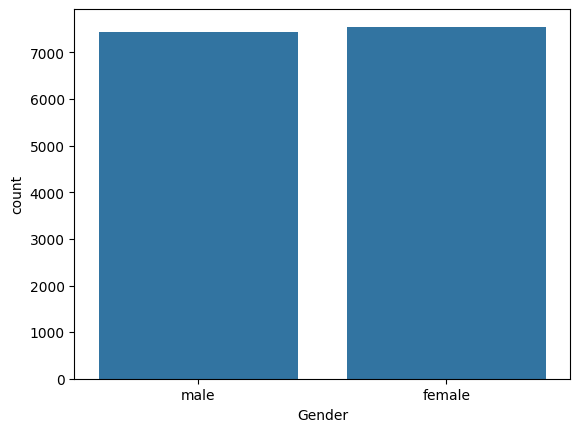

In [8]:
sns.countplot(x='Gender', data=df)
plt.show()

<Axes: xlabel='Gender', ylabel='Age'>

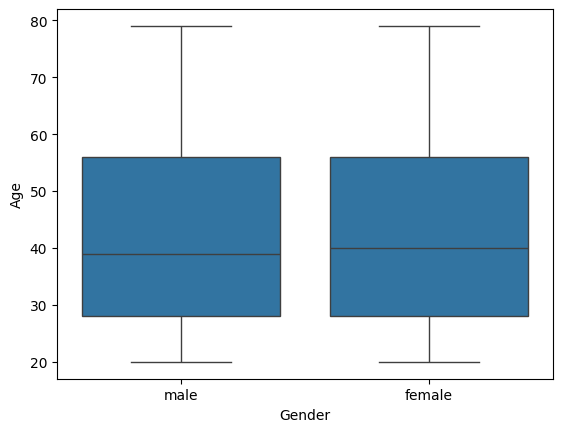

In [9]:
sns.boxplot(x='Gender', y='Age', data=df)
#about the same distrubition 

<Axes: xlabel='Gender', ylabel='Height'>

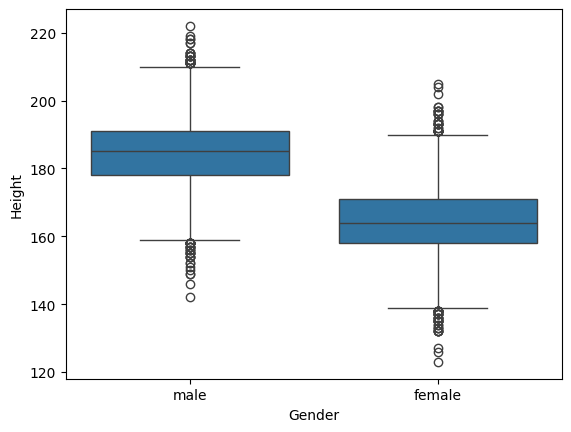

In [10]:
sns.boxplot(x='Gender', y='Height', data=df)
#Males' height is much taller 

<Axes: xlabel='Gender', ylabel='Weight'>

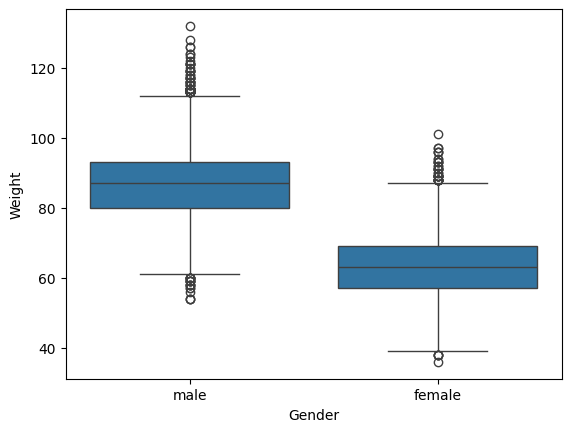

In [11]:
sns.boxplot(x='Gender', y='Weight', data=df)
#Males' weight is much more

In [12]:
df['Gender'] = df['Gender'].replace({'male':1,'female':0})

In [13]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...
14995,0,20,193,86,11,92,40.4,45
14996,0,27,165,65,6,85,39.2,23
14997,0,43,159,58,16,90,40.1,75
14998,1,78,193,97,2,84,38.3,11


In [14]:
df.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


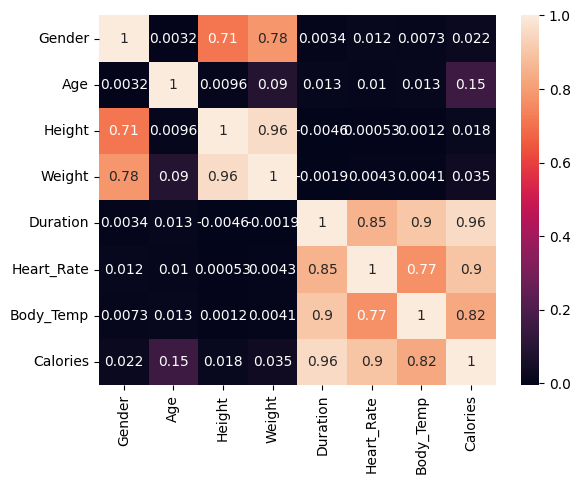

In [15]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
X = df.drop('Calories', axis=1)
y= df['Calories']
reg = LinearRegression()
reg.fit(X,y)
reg_predictions = reg.predict(X)

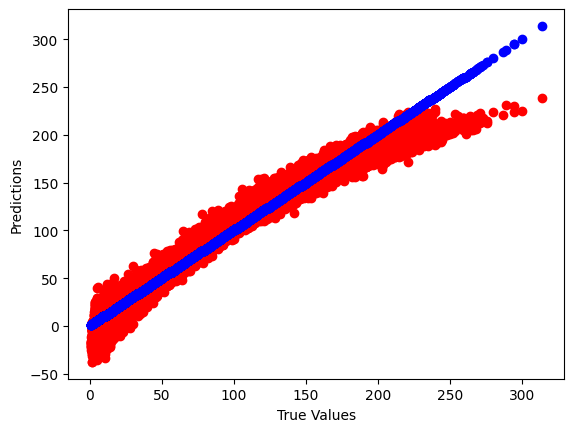

In [17]:
plt.scatter(y, reg_predictions,color="Red")
plt.scatter(y, y, color='blue')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error
Reg_score = reg.score(X,y)
Reg_score
amse = mean_absolute_error(y, reg_predictions)
reg_metrics = {'Reg_score':Reg_score, 'AMSE':amse}
reg_metrics

{'Reg_score': 0.9672011449723691, 'AMSE': 8.35160770619021}

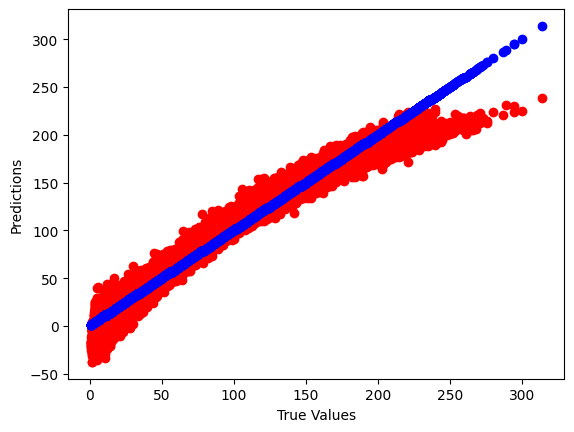

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X,y)
ridge_predictions = ridge.predict(X)

plt.scatter(y, ridge_predictions,color="Red")
plt.scatter(y, y, color='blue')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [20]:
Ridge_score = ridge.score(X,y)
amse = mean_absolute_error(y, ridge_predictions)
ridge_metrics = {'Ridge_score':Ridge_score, 'AMSE':amse}
ridge_metrics

{'Ridge_score': 0.9672011418183023, 'AMSE': 8.351578327603383}

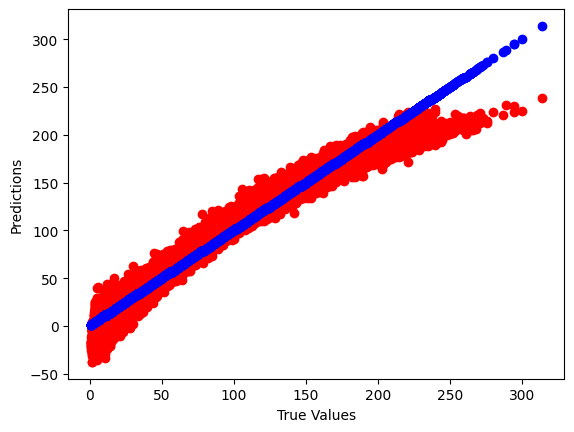

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X,y)
lasso_predictions = ridge.predict(X)

plt.scatter(y, lasso_predictions,color="Red")
plt.scatter(y, y, color='blue')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [22]:
Lasso_score = lasso.score(X,y)
amse = mean_absolute_error(y, lasso_predictions)
Lasso_metrics = {'Lasso_score':Lasso_score, 'AMSE':amse}
reg_metrics

{'Reg_score': 0.9672011449723691, 'AMSE': 8.35160770619021}

In [23]:
metrics = [Lasso_metrics, reg_metrics, ridge_metrics]

In [24]:
metrics
#best out of those is linear regression

[{'Lasso_score': 0.9644041650089842, 'AMSE': 8.351578327603383},
 {'Reg_score': 0.9672011449723691, 'AMSE': 8.35160770619021},
 {'Ridge_score': 0.9672011418183023, 'AMSE': 8.351578327603383}]